In [ ]:
#%load_ext tensorboard
%pip install tables
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from createModel import CreateModel
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# I think  enable_dump_debug_info or pip install -U tensorboard-plugin-profile made everything slow
# this causes an issue with saving (can use h5 if needed)
# https://github.com/tensorflow/tensorflow/issues/48867
# https://github.com/tensorflow/tensorflow/issues/36833
#tf.debugging.experimental.enable_dump_debug_info(log_dir, tensor_debug_mode="FULL_HEALTH", circular_buffer_size=-1)

gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")


In [ ]:
modelCreator = CreateModel()
rnn,history = modelCreator.createModel('shortEntry100')

In [5]:
history = history.history
(max(history['auc']),max(history['accuracy']),  min(history['loss']), 
max(history['val_auc']),max(history['val_accuracy']),  min(history['val_loss']))


(0.701381504535675,
 0.86628657579422,
 0.6290060877799988,
 0.6743984818458557,
 0.9904123544692993,
 0.07725095748901367)

In [6]:
modelCreator.trainLaggedReturns.shape,modelCreator.trainFeatures.shape,modelCreator.allTrainTargets.shape

((38590, 120, 1), (38590, 178), (38590, 9))

In [7]:
modelCreator.trainFeatures.tail()

,CurrentOpen,Open,High,Low,Close,Volume,Trade count,VWAP,ad_real,add_real,...,trima_real,trix_real,tsf_real,typprice_real,ultosc_real,var_real,wclprice_real,willr_real,wma_real,outWQA1
Open time,,,,,,,,,,,,,,,,,,,,,
2021-06-01 19:00:00+00:00,36211.41,36158.19,36496.90,36090.28,36231.97,2888.051031,24496.0,36284.6040,-2.755937e+06,72587.18,...,36829.181868,0.053905,36048.468302,36273.050000,48.155467,54104.998847,36262.7800,-67.712636,36609.279294,0.25
2021-06-01 20:00:00+00:00,35983.18,36211.41,36233.68,35769.31,35983.15,1588.047312,25193.0,35973.3547,-2.756063e+06,72002.99,...,36797.457867,0.051646,36041.899961,35995.380000,49.254333,16993.632484,35992.3225,-81.637621,36560.513746,0.25
2021-06-01 21:00:00+00:00,36305.30,35983.18,36353.80,35868.13,36332.75,1261.582069,22429.0,36113.2614,-2.754910e+06,72221.93,...,36761.653199,0.049376,36116.680301,36184.893333,47.065425,23488.158676,36221.8575,-61.623489,36535.902715,0.25
2021-06-01 22:00:00+00:00,36425.70,36305.30,36487.77,36036.32,36425.70,1408.928019,21500.0,36312.7987,-2.753889e+06,72524.09,...,36721.059489,0.047182,36221.261960,36316.596667,53.633493,22976.998516,36343.8725,-56.360033,36517.963404,0.25
2021-06-01 23:00:00+00:00,36439.76,36425.70,36617.00,36216.52,36429.11,2071.671710,22621.0,36406.2965,-2.753761e+06,72833.52,...,36678.983238,0.045064,36229.225707,36420.876667,56.547607,27334.042325,36422.9350,-56.166936,36501.462888,0.50


In [8]:
rnn.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Returns (InputLayer)            [(None, 120, 1)]     0                                            
__________________________________________________________________________________________________
LSTM1 (LSTM)                    (None, 120, 200)     161600      Returns[0][0]                    
__________________________________________________________________________________________________
LSTM2 (LSTM)                    (None, 100)          120400      LSTM1[0][0]                      
__________________________________________________________________________________________________
Features (InputLayer)           [(None, 178)]        0                                            
______________________________________________________________________________________________

In [9]:
from modelAnalyzer import ModelAnalyzer

longAnalyzer = ModelAnalyzer(history, "./")
longAnalyzer.makeFigs()


ModuleNotFoundError: No module named 'hvplot'

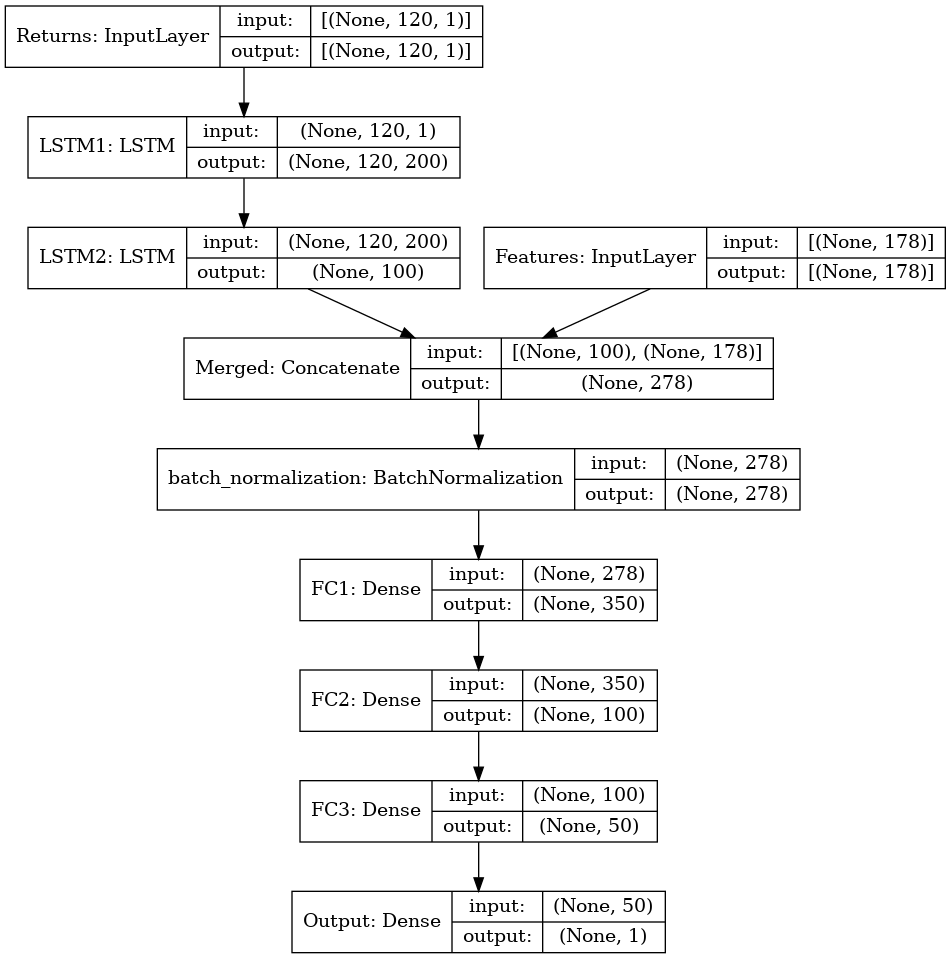

In [84]:

from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot

#model_to_dot(rnn, show_shapes=True, show_layer_names=True)
plot_model(rnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)